In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # plotting
from scipy import stats # statistics

# Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
      titleweight='bold', titlesize=18, titlepad=10)
plt.rcParams['figure.figsize'] = [18,10]

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2022/train.csv
/kaggle/input/tabular-playground-series-mar-2022/test.csv


In [2]:
data_set = pd.read_csv("/kaggle/input/tabular-playground-series-mar-2022/train.csv")
data_set.head(20)

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
5,5,1991-04-01 00:00:00,0,1,SB,58
6,6,1991-04-01 00:00:00,0,1,WB,26
7,7,1991-04-01 00:00:00,0,2,EB,31
8,8,1991-04-01 00:00:00,0,2,NB,49
9,9,1991-04-01 00:00:00,0,2,SB,46


In [3]:
data_set['coord_sym'] = 10*data_set['x'] + data_set['y']
unique_coords = data_set['coord_sym'].unique()

print(unique_coords)
print(unique_coords.shape)

[ 0  1  2  3 10 11 12 13 20 21 22 23]
(12,)


In [4]:
df_00 = data_set[data_set["coord_sym"]==0]
df_01 = data_set[data_set["coord_sym"]==1]
df_02 = data_set[data_set["coord_sym"]==2]
df_03 = data_set[data_set["coord_sym"]==3]

df_10 = data_set[data_set["coord_sym"]==10]
df_11 = data_set[data_set["coord_sym"]==11]
df_12 = data_set[data_set["coord_sym"]==12]
df_13 = data_set[data_set["coord_sym"]==13]

df_20 = data_set[data_set["coord_sym"]==20]
df_21 = data_set[data_set["coord_sym"]==21]
df_22 = data_set[data_set["coord_sym"]==22]
df_23 = data_set[data_set["coord_sym"]==23]

In [5]:
print("Size of df_00: ",df_00.shape[0])
print("Size of df_01: ",df_01.shape[0])
print("Size of df_02: ",df_02.shape[0])
print("Size of df_03: ",df_03.shape[0])

print("Size of df_10: ",df_10.shape[0])
print("Size of df_11: ",df_11.shape[0])
print("Size of df_12: ",df_12.shape[0])
print("Size of df_13: ",df_13.shape[0])

print("Size of df_20: ",df_20.shape[0])
print("Size of df_21: ",df_21.shape[0])
print("Size of df_22: ",df_22.shape[0])
print("Size of df_23: ",df_23.shape[0])

Size of df_00:  39177
Size of df_01:  52236
Size of df_02:  52236
Size of df_03:  78354
Size of df_10:  78354
Size of df_11:  52236
Size of df_12:  78354
Size of df_13:  78354
Size of df_20:  52236
Size of df_21:  104472
Size of df_22:  104472
Size of df_23:  78354


In [6]:
uni_dir_00 = df_00["direction"].unique()
print("There are: ",uni_dir_00.shape[0]," directions for df_00, which are: (",uni_dir_00,")")
uni_dir_01 = df_01["direction"].unique()
print("There are: ",uni_dir_01.shape[0]," directions for df_01, which are: (",uni_dir_01,")")
uni_dir_02 = df_02["direction"].unique()
print("There are: ",uni_dir_02.shape[0]," directions for df_02, which are: (",uni_dir_02,")")
uni_dir_03 = df_03["direction"].unique()
print("There are: ",uni_dir_03.shape[0]," directions for df_03, which are: (",uni_dir_03,")")

uni_dir_10 = df_10["direction"].unique()
print("There are: ",uni_dir_10.shape[0]," directions for df_10, which are: (",uni_dir_10,")")
uni_dir_11 = df_11["direction"].unique()
print("There are: ",uni_dir_11.shape[0]," directions for df_11, which are: (",uni_dir_11,")")
uni_dir_12 = df_12["direction"].unique()
print("There are: ",uni_dir_12.shape[0]," directions for df_12, which are: (",uni_dir_12,")")
uni_dir_13 = df_13["direction"].unique()
print("There are: ",uni_dir_13.shape[0]," directions for df_13, which are: (",uni_dir_13,")")

uni_dir_20 = df_20["direction"].unique()
print("There are: ",uni_dir_20.shape[0]," directions for df_20, which are: (",uni_dir_20,")")
uni_dir_21 = df_21["direction"].unique()
print("There are: ",uni_dir_21.shape[0]," directions for df_21, which are: (",uni_dir_21,")")
uni_dir_22 = df_22["direction"].unique()
print("There are: ",uni_dir_22.shape[0]," directions for df_22, which are: (",uni_dir_22,")")
uni_dir_23 = df_23["direction"].unique()
print("There are: ",uni_dir_23.shape[0]," directions for df_23, which are: (",uni_dir_23,")")

There are:  3  directions for df_00, which are: ( ['EB' 'NB' 'SB'] )
There are:  4  directions for df_01, which are: ( ['EB' 'NB' 'SB' 'WB'] )
There are:  4  directions for df_02, which are: ( ['EB' 'NB' 'SB' 'WB'] )
There are:  6  directions for df_03, which are: ( ['EB' 'NB' 'NE' 'SB' 'SW' 'WB'] )
There are:  6  directions for df_10, which are: ( ['EB' 'NB' 'NE' 'SB' 'SW' 'WB'] )
There are:  4  directions for df_11, which are: ( ['EB' 'NB' 'SB' 'WB'] )
There are:  6  directions for df_12, which are: ( ['EB' 'NB' 'NE' 'SB' 'SW' 'WB'] )
There are:  6  directions for df_13, which are: ( ['EB' 'NB' 'NE' 'SB' 'SW' 'WB'] )
There are:  4  directions for df_20, which are: ( ['EB' 'NB' 'SB' 'WB'] )
There are:  8  directions for df_21, which are: ( ['EB' 'NB' 'NE' 'NW' 'SB' 'SE' 'SW' 'WB'] )
There are:  8  directions for df_22, which are: ( ['EB' 'NB' 'NE' 'NW' 'SB' 'SE' 'SW' 'WB'] )
There are:  6  directions for df_23, which are: ( ['EB' 'NB' 'NE' 'SB' 'SW' 'WB'] )


In [7]:
df_00_eb = df_00[df_00["direction"]=="EB"]
#df_00_eb['time'] = pd.to_datetime(df_00_eb['time']).astype(int)/ 10**9
N = df_00_eb.shape[0]
print(df_00_eb.shape)
print(df_00_eb.head())

(13059, 7)
     row_id                 time  x  y direction  congestion  coord_sym
0         0  1991-04-01 00:00:00  0  0        EB          70          0
65       65  1991-04-01 00:20:00  0  0        EB          70          0
130     130  1991-04-01 00:40:00  0  0        EB          70          0
195     195  1991-04-01 01:00:00  0  0        EB          70          0
260     260  1991-04-01 01:20:00  0  0        EB          70          0


In [8]:
df_00_sb = df_00[df_00["direction"]=="SB"]
print(df_00_sb.shape)
print(df_00_sb.head(10))

(13059, 7)
     row_id                 time  x  y direction  congestion  coord_sym
2         2  1991-04-01 00:00:00  0  0        SB          24          0
67       67  1991-04-01 00:20:00  0  0        SB          24          0
132     132  1991-04-01 00:40:00  0  0        SB          24          0
197     197  1991-04-01 01:00:00  0  0        SB          24          0
262     262  1991-04-01 01:20:00  0  0        SB          24          0
327     327  1991-04-01 01:40:00  0  0        SB          24          0
392     392  1991-04-01 02:00:00  0  0        SB          65          0
457     457  1991-04-01 02:20:00  0  0        SB          65          0
522     522  1991-04-01 02:40:00  0  0        SB          65          0
587     587  1991-04-01 03:00:00  0  0        SB          65          0


In [9]:
df_10_sb = df_10[df_10["direction"]=="SB"]
print(df_10_sb.shape)
print(df_10_sb.head())

(13059, 7)
     row_id                 time  x  y direction  congestion  coord_sym
20       20  1991-04-01 00:00:00  1  0        SB          44         10
85       85  1991-04-01 00:20:00  1  0        SB          43         10
150     150  1991-04-01 00:40:00  1  0        SB          43         10
215     215  1991-04-01 01:00:00  1  0        SB          78         10
280     280  1991-04-01 01:20:00  1  0        SB          18         10


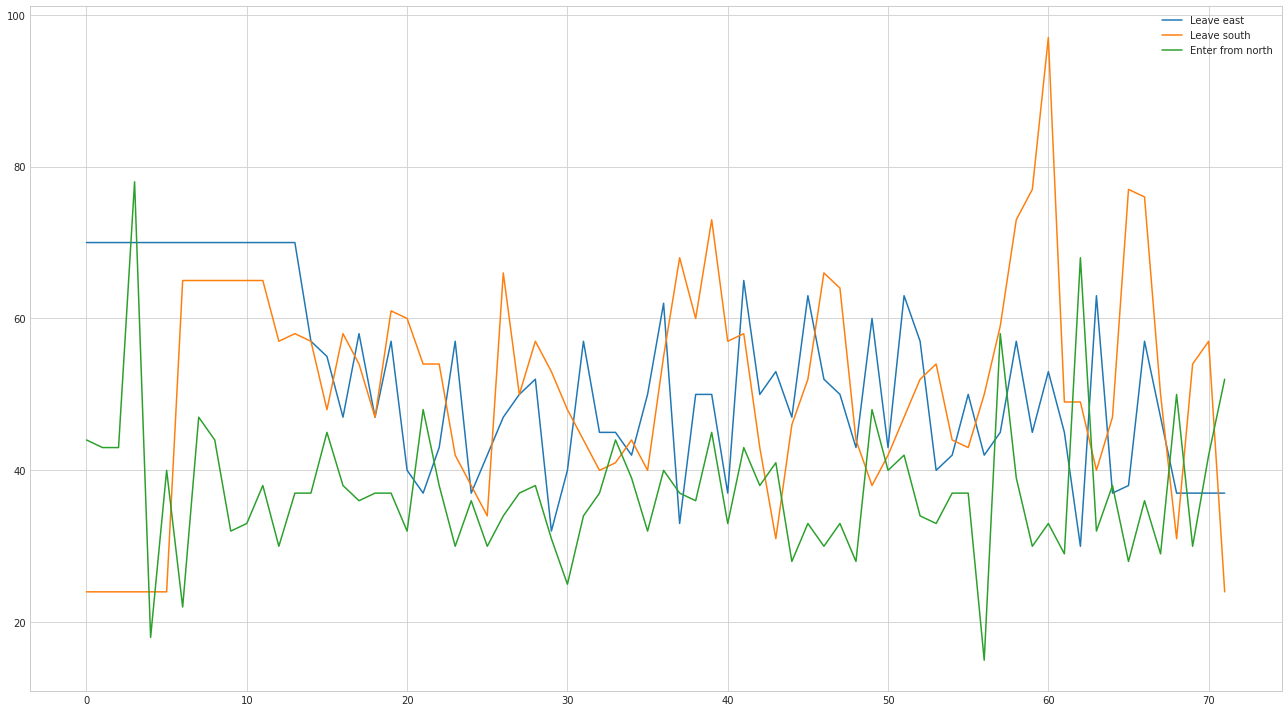

In [10]:
k = 24*3
x1 = df_00_eb['congestion'][0:k]#[k+1:2*k+1]#
x2 = df_00_sb['congestion'][0:k]
x3 = df_10_sb['congestion'][0:k]

plt.plot(range(k),x1,label='Leave east')
plt.plot(range(k),x2,label='Leave south')
plt.plot(range(k),x3,label='Enter from north')

plt.legend()
plt.show()


In [11]:
print(df_00_sb.iloc[6]['congestion'])
print(df_10_sb.iloc[3]['congestion'])
print()

print(df_00_sb.iloc[60]['congestion'])
print(df_10_sb.iloc[57]['congestion'])

#Pretty clearly southbound congestion out of (0,0) is a function of the with delay of 1 hour(3 20 minute samples) from southbound (0,1)

65
78

97
58


In [12]:
df_01_wb = df_01[df_01["direction"]=="WB"]
print(df_01_wb.shape)
print(df_01_wb.head())

(13059, 7)
     row_id                 time  x  y direction  congestion  coord_sym
6         6  1991-04-01 00:00:00  0  1        WB          26          1
71       71  1991-04-01 00:20:00  0  1        WB          57          1
136     136  1991-04-01 00:40:00  0  1        WB          91          1
201     201  1991-04-01 01:00:00  0  1        WB          49          1
266     266  1991-04-01 01:20:00  0  1        WB          62          1


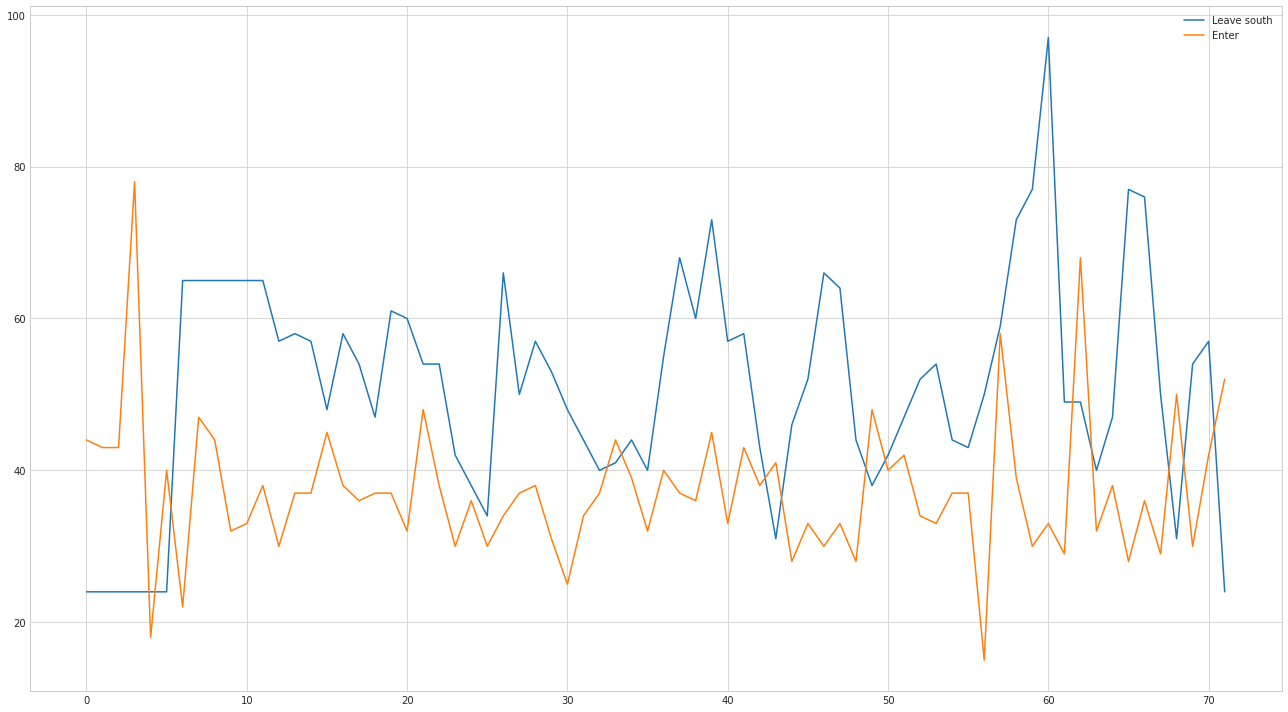

In [13]:
k = 24*3

x1 = df_00_sb['congestion'][0:k]
x2 = df_10_sb['congestion'][0:k]
x3 = df_01_wb['congestion'][0:k]
x4 = x2
x4.add(x3)

plt.plot(range(k),x1,label='Leave south')
plt.plot(range(k),x4,label='Enter')
#plt.plot(range(k),x2,label='Enter from north')
#plt.plot(range(k),x3,label='Enter from west')

plt.legend()
plt.show()

In [14]:
#my_test = TimeSeriesPlot(df_00_eb['congestion'] ,df_00_eb['time'] )
#df_00_tss = TimeSeriesStats(df_00_eb['congestion'])

#print(df_00_tss.mean)
#print(df_00_tss.var)
#print(df_00_tss.min)
#print(df_00_tss.max)

#day_entries = 24*3
#df_00_eb['time'][0:day_entries+1]

#unique_dir = df_00['direction'].unique()
#print(unique_dir.shape)
#print(unique_dir)